In [1]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap

In [2]:
fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0] 
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]
fullmeasuredPeriod =[0.0040133453800952406, 0.010427782042886431, 0.009501724728043965, 0.087377200077017325, 0.013519998413067889, 0.048329192136173323, 0.01852565756257446, 0.021668286398817686, 0.040437257751531334, 0.046043614378791391, 2.6643036569764793, 1.2743288628467164, 2.1983573874249958, 3.7924901723697726, 6.5425106690916985, 11.28981433014861, 19.4841208067783, 33.619644250399489, 57.885743114042526, 99.996372586916806, 0.0031622778549082807, 0.0054555952421481363, 0.009501724728043965, 0.016237760269765582, 0.032851112151763263, 0.04832919077884381, 0.042623271790306762, 0.143845337198969, 0.24816369752687459, 0.42812911138145421, 0.73861930448322433, 1.2743401872253006, 2.1983658127322636, 3.7925737566745448, 6.5416153080861372, 11.289518059636263, 19.488092620653575, 33.611764147257333, 57.827386153396496, 100.03706462673192, 0.0031622776108376381, 0.0054555950000014473, 0.0094120472067038691, 0.016237773140345503, 0.028013568827815451, 0.04832920299481222, 0.083378300387762977, 0.14384502456928169, 0.24816291018374809, 0.42812889834911644, 0.73862025559017852, 1.2743260317835186, 2.1983573874249958, 3.7925152472743586, 6.5422121881912103, 11.288555287851608, 19.484562039480227, 33.630156804005871, 57.864331890975926, 99.95571363821324, 0.0031622775585367904, 0.0054555947059662119, 0.0094120474126219242, 0.016237770995247432, 0.02801357156405684, 0.048329209781463996, 0.083378284228102992, 0.14384501254509008, 0.24816219442160484, 0.42812900486525884, 0.73862627932443725, 1.2743316939224938, 2.1983601958535761, 3.7926991400399941, 6.5423614252370701, 11.287444601359503, 19.483017812446978, 33.634100706758623, 57.934463963257812, 99.949907915931604, 0.0031622775585367904, 0.0054555946713738326, 0.0094120473611424092, 0.016237770995247432, 0.02801357156405684, 0.048329209781463996, 0.083378276148275351, 0.14384500052090049, 0.24816215863360599, 0.42812911138145421, 0.73862659636580419, 1.2743326376172148, 2.1983601958535761, 3.7926991400399941, 6.5423614252370701, 11.287444601359503, 19.48257664968029, 33.634758113818833, 57.934463963257812, 99.944102868037689, 0.0031622775527255851, 0.0054555947232624007, 0.0094120474126219242, 0.016237770995247432, 0.028013571108016572, 0.048329211138794584, 0.083378272108362128, 0.1438449884967129, 0.24816226599763336, 0.42812900486525884, 0.73862659636580419, 1.2743316939224938, 2.1983601958535761, 3.7927242177079399, 6.5423614252370701, 11.287444601359503, 19.482797228566245, 33.63344332539657, 57.930563277407977, 99.949907915931604, 0.0031622775817816118, 0.0054555946540776439, 0.0094120474641014393, 0.016237770842026163, 0.028013572020097126, 0.048329212496125248, 0.083378276148275351, 0.14384501254509008, 0.24816237336175354, 0.42812911138145421, 0.73862627932443725, 1.2743316939224938, 2.1983573874249958, 3.7927158584484437, 6.5423862987399977, 11.287296526340578, 19.482797228566245, 33.634100706758623, 57.932513554673093, 99.938298494414028, 0.0031622775556188337, 0.0054555945308764897, 0.0094120479104470578, 0.016237766418426572, 0.028013571729267429, 0.048329232655860539, 0.083378268536847364, 0.14384500296128114, 0.24816232768729585, 0.42812942003825699, 0.73862236001377723, 1.2743345597177707, 2.1983720085689504, 3.7926597497373256, 6.5422301412056267, 11.287852652499589, 19.477497982499013, 33.640548942209008, 57.938306961749987, 99.978414283977571, 0.003162277544040055, 0.0054555945653390042, 0.0094120479617333212, 0.016237766723718534, 0.028013571729267429, 0.048329231303624293, 0.083378272561594066, 0.14384501494033128, 0.24816225637993439, 0.42812963227136985, 0.73862236001377723, 1.2743383203510363, 2.1983608169493665, 3.7926597497373256, 6.5422549203364166, 11.288000186161856, 19.477278351201736, 33.635308339196932, 57.936363617134042, 99.972627728253656, 0.0031622775614082231, 0.0054555945998015195, 0.0094120479104470578, 0.016237766418426572, 0.028013572183595702, 0.048329232655860539, 0.08337826451210105, 0.14384500296128114, 0.24816229203361001, 0.42812973838800517, 0.73862236001377723, 1.2743402006759925, 2.1983748064916511, 3.7926597497373256, 6.5422549203364166, 11.287852652499589, 19.477717618749598, 33.643169856153158, 57.940250436740513, 99.955272079359062, 0.0031622775324612763, 0.0054555945998015195, 0.0094120477565882762, 0.016237766723718534, 0.028013569911954483, 0.048329236712569758, 0.083378268536847364, 0.14384503889843758, 0.24816222072626898, 0.42812942003825699, 0.73862267586159092, 1.2743336195629225, 2.1983496254437322, 3.7926514221422511, 6.5421558049394717, 11.287852652499589, 19.477058724857596, 33.636618336870242, 57.936363617134042, 99.961056626060682, 0.003162277544040055, 0.0054555944791827198, 0.0094120481668783767, 0.016237765502550749, 0.028013571274939173, 0.048329225894680035, 0.083378288660584748, 0.143844990982233, 0.24816225637993439, 0.42812995062143361, 0.73862172831896011, 1.2743326794094614, 2.1983692106533717, 3.7927097160757559, 6.5422549203364166, 11.287705122693788, 19.476399875542324, 33.635963325278681, 57.951914025285028, 99.961056626060682, 0.0031622775382506656, 0.0054555945653390042, 0.0094120479617333212, 0.01623776687636452, 0.028013573092252296, 0.048329229951388109, 0.083378248413119679, 0.14384497900318682, 0.2481624703021417, 0.42812931392177944, 0.73862204416623356, 1.2743402006759925, 2.1983608169493665, 3.7926847327419719, 6.5422796996549133, 11.288073954439213, 19.477058724857596, 33.641859348134631, 57.944137777897836, 100.00156720710342, 0.0031622776482490662, 0.0054555947376515816, 0.0094120483207371722, 0.016237765807842679, 0.028013568094641769, 0.048329250234938725, 0.083378252437864439, 0.14384501494033128, 0.24816236334099195, 0.42812920780535452, 0.73862172831896011, 1.2743336195629225, 2.1983692106533717, 3.7927180439268278, 6.5422301412056267, 11.287778887114639, 19.477497982499013, 33.643169856153158, 57.926648849214232, 99.943704994164378, 0.0031622775671976125, 0.005455594651495292, 0.0094120482181646401, 0.016237766571072551, 0.028013575363894032, 0.048329234008096876, 0.08337826451210105, 0.14384501494033128, 0.2481624703021417, 0.42812910168898222, 0.73862204416623356, 1.274348662206964, 2.1983971901296515, 3.7926347670618115, 6.5422301412056267, 11.287410074650984, 19.477278351201736, 33.644480466276512, 57.940250436740513, 100.0421106363889, 0.0031622775093037192, 0.0054555943068701589, 0.0094120482181646401, 0.016237766571072551, 0.028013573546580614, 0.048329231303624293, 0.083378268536847364, 0.143844990982233, 0.24816211376533437, 0.42812931392177944, 0.73862425510471152, 1.2743420810064974, 2.1983887962119857, 3.792643094583747, 6.5422053622625409, 11.287631359237016, 19.475741070799263, 33.643825148450986, 57.940250436740513, 99.961056626060682, 0.0031622775324612763, 0.005455594393026438, 0.0094120480643058464, 0.016237767181656499, 0.028013572183595702, 0.048329232655860539, 0.083378252437864439, 0.14384494306606033, 0.24816229203361001, 0.42812942003825699, 0.73862267586159092, 1.2743383203510363, 2.1983552211823056, 3.7926514221422511, 6.5421558049394717, 11.287262556413676, 19.476839103466425, 33.645791178516625, 57.953858413265188, 99.943704994164378, 0.0031622775266718873, 0.0054555943068701589, 0.0094120483720234391, 0.016237767334302496, 0.028013573546580614, 0.048329220485736991, 0.083378280611088637, 0.1438449550451005, 0.24816218507261387, 0.42812878334018095, 0.73862267586159092, 1.2743439613425518, 2.1983496254437322, 3.7926597497373256, 6.5423292588550312, 11.287852652499589, 19.476399875542324, 33.642514589381534, 57.949969767771343, 99.995777971054679, 0.003162277520882498, 0.0054555945653390042, 0.0094120485771685119, 0.016237767181656499, 0.028013571729267429, 0.048329252939413425, 0.08337820816569344, 0.143844990982233, 0.24816204245809584, 0.42812952615478711, 0.73862362340665288, 1.2743477220313069, 2.198352423309458, 3.7927846680520032, 6.5424779409605494, 11.286820024836317, 19.474643161931215, 33.648412909394899, 57.942194042118757, 99.978414283977571, 0.0031622774745673843, 0.0054555946342640339, 0.009412047602729498, 0.01623776687636452, 0.028013569911954483, 0.048329235360333282, 0.083378232314144526, 0.143844990982233, 0.24816200680449194, 0.42813069344009036, 0.73861983324099179, 1.2743213976761301, 2.1983580190622751, 3.7927180439268278, 6.5423044791611167, 11.288000186161856, 19.47618026900906, 33.646446572934202, 57.971363778245397, 99.88590970216832]
fullSigLevel = [0.0, 1.0, 1.0, 0.19999999999999996, 0.6, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.8, 0.8, 0.4, 1.0, 0.6, 0.4, 1.0, 1.0, 0.19999999999999996, 1.0, 0.8, 0.6, 0.19999999999999996, 1.0, 1.0, 0.8, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
#  powerlist 
# [0.1894897124452849, 0.21925976991327006, 0.22915043824446196, 0.16867359071994315, 0.1597776171146669, 0.17625582137297119, 0.14315817120979601, 0.18899524928405428, 0.21237520764994003, 0.17792984150078156, 0.16070202794901256, 0.18642184500439957, 0.15021516280211036, 0.13106870177678204, 0.16416219511181646, 0.14885712044178653, 0.16383851689095455, 0.16941355726857371, 0.15611077451322766, 0.16971660299011629, 0.13308554898091834, 0.20192804659661812, 0.27774572266772202, 0.16338214602170867, 0.20523944472765202, 0.16881580476076419, 0.13372908419205479, 0.24127880188799791, 0.16841400899413142, 0.23887078534667927, 0.12732974058179169, 0.26461720106867709, 0.19278023455303098, 0.14433386421072589, 0.14494584775486366, 0.19054505915694642, 0.17675127605786584, 0.15975605327112136, 0.16198892430205736, 0.29456012306985863, 0.096352901237328439, 0.19941845993876844, 0.25623547010355546, 0.18538261366327966, 0.23476135986281915, 0.19849630876473068, 0.099348495144695598, 0.24915939721710939, 0.10658490945928681, 0.23909973806519266, 0.12756250950189416, 0.22370999597659791, 0.17048132074225825, 0.17313759895937353, 0.16524702102119068, 0.15149483325477037, 0.16803486525139236, 0.20347307581830315, 0.22303534726516219, 0.28932611245398238, 0.075945133528043759, 0.17646768024281942, 0.24573033754238321, 0.15625459458561533, 0.23258457327091259, 0.17323080177958555, 0.10078789870901075, 0.24566167384382395, 0.095248053435772764, 0.19135579455681131, 0.10594828696644321, 0.19223563396994914, 0.15638227906969596, 0.14172359613780722, 0.1471942534076533, 0.11898808979661057, 0.14547492187857619, 0.17669372270197037, 0.20506045261046543, 0.26873159453847528, 0.077513352492795701, 0.17554791985624249, 0.2455467056902243, 0.15637449511578849, 0.23395825849143811, 0.17207320451163594, 0.1007999776330043, 0.24754419547459874, 0.094469226486171787, 0.19144413580752445, 0.10507314039842626, 0.19254872863464781, 0.15657076982705959, 0.1432889347281518, 0.1480092506052503, 0.11805460980434043, 0.14569178677736996, 0.17644053498479362, 0.20595976134472463, 0.2658510286201709, 0.077374636961297649, 0.18123423370865741, 0.24417433208663153, 0.15630522689303117, 0.23371382914678265, 0.17350502505910542, 0.10139599387113313, 0.24823251488756196, 0.094392440106708414, 0.19179386662860712, 0.10617672484742008, 0.1940944509121208, 0.15505318021582692, 0.14196063965641928, 0.1472945613991028, 0.11878641308609914, 0.14600365514547806, 0.17585197919032203, 0.20386655768806469, 0.26524637640210558, 0.076104721832656472, 0.17461011521324146, 0.24742124715491312, 0.15717191366660932, 0.23287305450931273, 0.17298000833408816, 0.099221431474686358, 0.24659278871613372, 0.091215695646975486, 0.19235234641525251, 0.10531823411313967, 0.19457153022869528, 0.15438873079667698, 0.13939887405680557, 0.14678653559216726, 0.11981160265189887, 0.14423905450662067, 0.17852268606696362, 0.20521138634905028, 0.26570303250193172, 0.066348030470073135, 0.17003351468675179, 0.22687976768343715, 0.14689926365778627, 0.26574418924779408, 0.15204393359393481, 0.086716263880211336, 0.23306080784364788, 0.099131771458285806, 0.18612658635737872, 0.11665212355770299, 0.19374478588133964, 0.16723516415081924, 0.12780659658060495, 0.13619921407643337, 0.10664099401023401, 0.14330804824482746, 0.20352614924125351, 0.2288877449019095, 0.2445663645076788, 0.067997796449626974, 0.17275786065081156, 0.23060999172085078, 0.15129991124481218, 0.25922086572039338, 0.14897980216818663, 0.083236544549773375, 0.23087580323908843, 0.098418886844548761, 0.18733445437951357, 0.11686023581323982, 0.18838607299172111, 0.16545195158796078, 0.13123174775958366, 0.13655923288436367, 0.11221073664028675, 0.14412646383547295, 0.2039266447066844, 0.22783678470118551, 0.24716188371196351, 0.066617145360941959, 0.17124430102375196, 0.23015678291492836, 0.1500323813360406, 0.2578050722221028, 0.14899310836434407, 0.086110216363115707, 0.23071399333753873, 0.09585181339713178, 0.1865214415020735, 0.11934351976097626, 0.19946518650246098, 0.16869084741814869, 0.12707352538008879, 0.13788137730548064, 0.10220371450928481, 0.14162875421203078, 0.20624164771675146, 0.2263054419792363, 0.2469072156349971, 0.064118018664918147, 0.17027067533802265, 0.23166111918944299, 0.15382120689215281, 0.26398051862294958, 0.14050618922936184, 0.084790864291812748, 0.22861221279470256, 0.096308936752039415, 0.18052358557448242, 0.11304430328467507, 0.18972750746021391, 0.17079226024987049, 0.12259573705840575, 0.1326203689010709, 0.10253457662236667, 0.13572639553775892, 0.20259868521430288, 0.22390825817207261, 0.2371058694886925, 0.066861506719112368, 0.16405335327714043, 0.21604550044615431, 0.14135859359210179, 0.26496706614885085, 0.15266662649569759, 0.081676486417513974, 0.2345206227361627, 0.096050737214127754, 0.18964780689975788, 0.11809437741521953, 0.19273024590001467, 0.15517683181068498, 0.10757545307033715, 0.13481085164120532, 0.10266905825562567, 0.13220640755074281, 0.19908811483047095, 0.22890034916103597, 0.24122812048571782, 0.063906568042080655, 0.16095407990993807, 0.21914041490322236, 0.16269598901425503, 0.2444471065685217, 0.15135295114165515, 0.077115013035050889, 0.22397222639655057, 0.093550320681250382, 0.1884998073855563, 0.11497208367800697, 0.16017151320374165, 0.1494112255054223, 0.11685822999722, 0.13305376263138219, 0.090389556525489065, 0.12595163591458136, 0.20027779598956441, 0.2285680763859152, 0.23962608010481806, 0.071922312617880957, 0.16917105141784433, 0.21005413795047881, 0.13291433650887707, 0.25484945894238631, 0.14748046477720839, 0.095917653320865728, 0.20370275568849944, 0.08937952499911872, 0.16155273818429658, 0.11250140913797903, 0.16936997247909613, 0.14196579940176349, 0.10177450495866744, 0.11742230982020059, 0.10361873115496451, 0.12028659760767926, 0.18134797052457757, 0.21848968525730117, 0.22359053966675255, 0.07312928946837563, 0.14903491285689363, 0.19517709464049529, 0.13509573120616392, 0.23502367627108781, 0.12666292592439543, 0.076240785158385546, 0.19638068307947981, 0.089331584013042045, 0.15495940917012305, 0.10816822396986531, 0.17185321429214734, 0.14472146962132909, 0.10939499391718037, 0.11904805442844824, 0.078417709480873898, 0.12732949000468943, 0.18139886825928284, 0.21850086556929091, 0.22359820094796171, 0.068054533589670077, 0.15457158737542384, 0.22807529317374581, 0.14312340835497739, 0.2618466585096732, 0.14514917284309506, 0.081072852105960685, 0.23084003222868715, 0.10669148298280207, 0.18480305096500582, 0.1093419892387502, 0.17119184378265706, 0.14888912849656713, 0.11565156446866637, 0.13009103458665056, 0.095498024898255929, 0.13014992043647861, 0.21675708561435791, 0.22646398344800983, 0.23812675588024335, 0.080604516321675354, 0.1443729793041286, 0.21758497090431661, 0.13150312530408595, 0.25319227581739095, 0.13948170092772896, 0.079917722893056153, 0.22538128325966175, 0.098696090703973685, 0.17480691453668148, 0.10870103643128318, 0.15347755618978021, 0.16201653057678059, 0.10569441538512622, 0.13537224016527227, 0.083595060219422729, 0.13274900153346544, 0.20530147347893585, 0.22893238019541257, 0.23085586535223082, 0.071928954196312483, 0.15040141390835932, 0.22496124378360169, 0.13434143892521355, 0.25406802325237471, 0.16922409850347636, 0.083093893958416432, 0.20847339617495697, 0.094005120816681609, 0.1603309583279435, 0.10309676357703938, 0.16079035772263955, 0.14983176288092787, 0.11344740051858976, 0.12509902980586285, 0.089280505066993227, 0.12588589303596018, 0.19869586569472522, 0.21028150213383617, 0.23387959230855099, 0.070530515762816354, 0.15854659521485903, 0.20479771948729805, 0.11641094557747451, 0.23084082002783779, 0.12013824619718354, 0.082953269972772886, 0.22411736256294809, 0.090621772040548082, 0.16046419971351891, 0.091106228739693235, 0.15873891930193668, 0.15077595967459437, 0.10140091707693358, 0.14303978554902272, 0.079171091497361373, 0.1153929050567381, 0.18751960709310889, 0.22327926700557843, 0.21178694954488989, 0.070556213416568356, 0.15695915764852122, 0.18136351358303426, 0.10674604241367677, 0.21501387510072179, 0.11501576254856216, 0.082011775101004616, 0.22092913638316075, 0.080863718293473955, 0.1408453756013206, 0.098866631167839752, 0.13857032853322149, 0.13348858057786595, 0.092367259515073741, 0.11668572457859901, 0.076765500293214828, 0.12685016315496597, 0.15413562566092076, 0.19356905457438298, 0.22160553801400767],
#  listnumberlist 
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
fullPeriod = [x*2 for x in fullPeriod]
fullmeasuredPeriod = [x*2 for x in fullmeasuredPeriod]

In [4]:
reshapelen = (len(fullMag))**0.5
reshapelen = int(reshapelen)
fullMagArray = np.asarray(fullMag)
fullMag = fullMagArray.reshape(-1,reshapelen)
fullMag = fullMag.tolist()
fullPeriodArray = np.asarray(fullPeriod)
fullPeriod = fullPeriodArray.reshape(-1,reshapelen)
fullPeriod = fullPeriod.tolist()
fullmeasuredPeriodArray = np.asarray(fullmeasuredPeriod)
fullmeasuredPeriod = fullmeasuredPeriodArray.reshape(-1,reshapelen)
fullmeasuredPeriod = fullmeasuredPeriod.tolist()
fullSigLevelArray = np.asarray(fullSigLevel)
fullSigLevel = fullSigLevelArray.reshape(-1,reshapelen)
fullSigLevel = fullSigLevel.tolist()

In [5]:
for x in range(len(fullPeriod)):
    fullPeriod[x], fullSigLevel[x], fullmeasuredPeriod[x] = (list(t) for t in zip(*sorted(zip(fullPeriod[x],fullSigLevel[x],fullmeasuredPeriod[x]))))

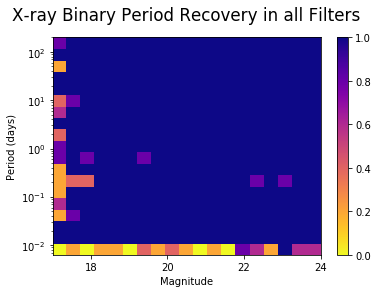

In [6]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')
plt.show()

In [7]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0
            othercount += 1
            if y == 0:
                seventeenth += 1
            if y == (len(fullPeriod)-1):
                twentyfour += 1
            if z == 0:
                lowPeriod += 1
            if z == len(fullPeriod[0]) - 1:
                highPeriod += 1
            if fullSigLevel[y][z] == 1.0:
                bigSig += 1
        else: 
            fullSigLevel[y][z] = 0
            count += 1

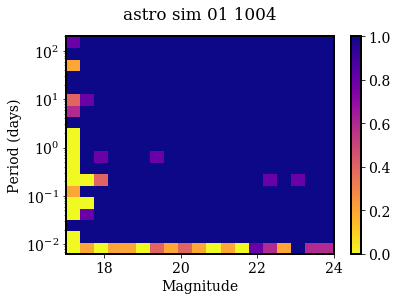

In [8]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('astro sim 01 1004',y=1.05)#,fontweight='semibold')
plt.savefig('astro500sig.png',dpi=500,bbox_inches='tight')
plt.show()

In [9]:
print(fullSigLevel)

[[0, 0, 1.0, 0, 0, 0.19999999999999996, 0, 0, 0, 0, 0, 1.0, 0.6, 0.4, 1.0, 1.0, 0.19999999999999996, 1.0, 0.8, 0.6], [0.19999999999999996, 1.0, 1.0, 0.8, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.19999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.1999

In [10]:
othercount

389

In [11]:
print('lowPeriod',lowPeriod/20.)
print('highPeriod',highPeriod/20.)
print('seventeenth',seventeenth/20.)
print('twentyfour',twentyfour/20.)
print('bigSig',bigSig/400.)
print('tot',othercount/400.)

lowPeriod 0.95
highPeriod 1.0
seventeenth 0.55
twentyfour 1.0
bigSig 0.895
tot 0.9725


In [12]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

gauss = []
for T in range(len(fullPeriod[0])):    
    gauss.append(gaussian(0.29,0.14,fullPeriod[0][T]))

normalised = [x/sum(gauss) for x in gauss]
weight = []
for x in range(len(fullPeriod)):
    for y in range(len(fullPeriod[x])):
        weight.append(fullSigLevel[x][y]*normalised[y])
print(sum(weight)/20)

0.918134785485


In [15]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

def newWeight(noSteps,fullPeriod,rM):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    distance = np.linspace(0.1,15.1,noSteps)
    magrange = np.linspace(17,24,len(fullPeriod))
    
    number = 0
    l = np.linspace(0., 360., 61)
    R = 2.273
    for i,x in enumerate(l):
        ebvPerD = []
        for d,dis in enumerate(distance):
            coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebvPerD.append(bayestar(coords, mode='median'))
        string = str(ebvPerD)
        if 'nan' in string:
            if number == 0:
                startNan = i
            ebvPerD = []
            number += 1
            for d,dis in enumerate(distance):
                angle = startNan-(x-startNan)
                coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
                ebvPerD.append(bayestar(coords, mode='median'))
        ebv.append(ebvPerD)

    mag = []
    #test = {}
    for y in range(len(l)):
        magperanlge = []
        for x,item in enumerate(distance): 
            magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
            #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
        mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    for x,angle in enumerate(l):
        for y,item in enumerate(distance):
            xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
            ylen = ((item*np.sin(np.deg2rad(l[x]))))

            if xlen**2+ylen**2 < 15**2:
                xtotal.append(xlen)
                ytotal.append(ylen)
                totmaglist.append(mag[x][y])
                dist = ((xlen**2)+(ylen**2))**0.5
                #brightProfilelist.append(np.exp(-(dist/Rd)))
                brightProfilelist.append((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
                othercounter += 1
                if mag[x][y] > 24 or mag[x][y] < 17:
                    counter += 1
        xlist.append(xtotal)
        ylist.append(ytotal)
        totmag.append(totmaglist)
        brightProfile.append(brightProfilelist)
    
    ### Cuurently using a uniform distribution of LMXBs, to change to sersic profile, multiple each positions magnitude
    ### by the likelyhood of a lmxb being there. Then normalise by dividing by the total number of positions multiplied by 
    ### their respective proportions. 

    magrange = np.linspace(17,24,len(fullPeriod))
    magbin = [[]]*20
    magrep = []
    magbinNo = [[]]*20
    for x,item in enumerate(magrange):
        magBinTemp = []
        magNoTemp = []
        for z in range(len(l)):
            if x < 19:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a < magrange[x+1]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]])
                #plt.plot()
            else:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a<magrange[19]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]])
        magbin[x] = magBinTemp
        magbinNo[x] = magNoTemp

    length = 0
    value = 0
    for x in range(len(brightProfile)):
        length += len(brightProfile[x])
        value += sum (brightProfile[x])
    magrepstep = []
    for x in range(len(magbin)):
        for y in range(len(magbin[x])):
            magrepstep.append((brightProfile[x][magbinNo[x][y]]*(1/value)))
            #print(len(magrepstep))
        magrep.append(sum(magrepstep))
        #print(magrep[x])

    magProp = [float(a)/len(magrep) for a in magrep]    

    
    def gaussian(average,std,xvalue):
        y = np.exp(-(((xvalue-average)/std)**2))
        return y

    mean = 2.3774375000000001
    std = 5.8535886356015618
    gauss = []
    
    for T in range(len(fullPeriod[0])):    
        gauss.append(gaussian(mean,std,fullPeriod[0][T]))

    normalised = [x/sum(gauss) for x in gauss]
    weight = []
    for x in range(len(fullPeriod)):
        for y in range(len(fullPeriod[x])):
            weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
            #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
    return sum(weight)

4.2726


In [16]:
newWeight(61,fullPeriod,rM)

0.36163428615518484